<h2>Practical Tasks. Lesson 7<h2>

<h3>Import modules<h3>

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

<h3>Task 1<h3>

Load and prepare dataset

In [151]:
X, y = load_iris(return_X_y=True)

X.shape, y.shape

((150, 4), (150,))

In [152]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

X = X.astype(float)
X = standard_scale(X)

common block

In [153]:
n_neighbors = [i for i in range(1, 11, 1)]

In [154]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [155]:
def makeClassification(X_train, X_test, y_train, n_neighbors):
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test= clf.predict(X_test)
    return y_pred_train, y_pred_test

In [156]:
def analyze_accuracy(X_train, X_test, y_train, y_test, n_neighbors, name):
    acc_train = []
    acc_test = []
    for k in n_neighbors:
        y_pred_train, y_pred_test = makeClassification(X_train, X_test, y_train, n_neighbors=k)
        acc_train.append(accuracy(y_pred_train, y_train))
        acc_test.append(accuracy(y_pred_test, y_test))
    plt.plot(n_neighbors, acc_train, label='train')
    plt.plot(n_neighbors, acc_test, label='test')
    plt.xlabel('neighbour number')
    plt.ylabel('accuracy')
    plt.title(name)
    plt.legend()

PCA block

In [157]:
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [158]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329989, 22.850761786701757, 3.668921889282871, 0.5178709107154924]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [159]:
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])
Z = X.dot(W)

Measure accuracy without PCA

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

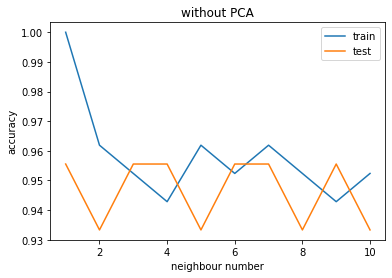

In [167]:
analyze_accuracy(X_train, X_test, y_train, y_test, n_neighbors, 'without PCA')

Measure accuracy with PCA

In [169]:
Z_train, Z_test, y_train_PCA, y_test_PCA = train_test_split(Z, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)
Z_train.shape, Z_test.shape

((105, 2), (45, 2))

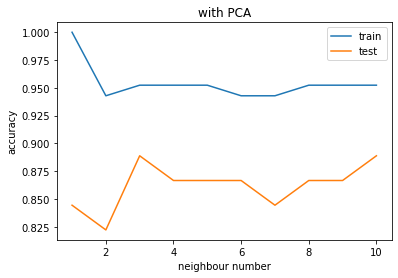

In [170]:
analyze_accuracy(Z_train, Z_test, y_train_PCA, y_test_PCA, n_neighbors, name='with PCA')

Получили, что после выполнения процедуры PCA точность предсказания на отложенной выборке упала не более, чем на 10 процентов независимо от числа соседей. Можно заключить, что убранные компоненты имеют слабую коррелляцию с таргетом и не являются шумом. При числе соседей, большем 3, можно без значительных потерь в точности обучать алгоритм на новой матрицы Z объектов-признаков.